<a href="https://colab.research.google.com/github/hnipun/ColabProjects/blob/master/utf_8''assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" below:

In [0]:
NAME = "Nipun Wijerathne"

---

## Generative Adversarial Network

Generative Adversarial Networks a.k.a GANs are emerging techniques that model high dimensional distribution of data. They achieve this by training a pair of networks, Generator and Discriminator, with competing loss terms. As an analogy we can think of these models as an art forger and the other being an art expert. In GAN literature we term Generator as the forger and the duty of the Generator is to produce fake images(forgeries) to deceive the art expert(Discriminator). The Discriminator which receives both the real images and fake images tries to distinguish between them and find the fake images. Both are trained simulataneously and are always in competition with each other. This competition between the Generator and Discriminator drives them to improve their models continuously. The models are trained until the Generator produces the fake images that are indistinguishable from the real images.  <br>

In this setup, the Generator does not have access to the real images whereas the Discriminator has access to both the real and the generated fake images. 

Let us define Discriminator D that takes image as input and produces a number **(0/1)** as output and a Generator G that takes random noise as input and outputs a fake image. In practice, G and D are trained alternately i.e., For a fixed generator G, the Discriminator D is trained to classify the training data as real(output a value close to 1) or fake(output a value close to 0). In the next step we freeze the Discriminator and we train the Generator G to produce a image(fake) that outputs a value close to 1(real) when passed through the Discriminator D. Thus, if the Generator is perfectly trained then the Discriminator D will be maximally confused by the images generated by G and predict 0.5 for all the inputs. 



In this assignment, we will try to implement a Generative Adversarial Network on MNIST data and generate images that resemble the digits from the MNIST dataset.

To implement a GAN, we basically require 5 components:

- Real Dataset (real distribution)
- Low dimensional random noise that is input to the Generator to produce fake images
- Generator that generates fake images
- Discriminator that acts as an expert to distinguish real and fake images.
- Training loop where the competition occurs and models better themselves.


Let us implement each of the parts and train the overall model:

In [2]:
## import packages

import torch
import random
import numpy as np
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



## Checks for the availability of GPU 
if torch.cuda.is_available():
    print("working on gpu!")
    device = 'cuda'
else:
    print("No gpu! only cpu ;)")
    device = 'cpu'
    
## The following random seeds are just for deterministic behaviour of the code and evaluation

##############################################################################
################### DO NOT MODIFY THE CODE BELOW #############################    
##############################################################################

if device == 'cpu':    
    random.seed(0)
    np.random.seed(0)
    torch.manual_seed(0)
elif device == 'cuda':
    random.seed(0)
    np.random.seed(0)
    torch.manual_seed(0)
    torch.cuda.manual_seed_all(0)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = '0'

############################################################################### 

No gpu! only cpu ;)


# Step -2

In this step we work on preparing the data. We normalize the images to range [-1, +1] 

In [3]:
import torchvision
import torchvision.transforms as transforms
import os

if not os.path.isdir('./data'):
    os.mkdir('./data')
root = './data/'

train_bs = 128

transform = transforms.Compose([transforms.ToTensor(),
         transforms.Normalize(mean=[0.5],
                                std=[0.5])
        ])

training_data = torchvision.datasets.MNIST(root, train=True, transform=transform,download=True)
train_loader=torch.utils.data.DataLoader(dataset=training_data, batch_size=train_bs, shuffle=True, drop_last=True)


0it [00:00, ?it/s]

9920512it [00:01, 8523026.02it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 130514.63it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2125173.92it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 49019.51it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


Let us define a function which takes (batchsize, dimension) as input and returns a random noise of requested dimensions. This noise tensor will be the input to the generator.

In [0]:
def noise(bs, dim):
    """Generate random Gaussian noise.
    
    Inputs:
    - bs: integer giving the batch size of noise to generate.
    - dim: integer giving the dimension of the the noise to generate.
    
    Returns:
    A PyTorch Tensor containing Gaussian noise with shape [bs, dim]
    """
    
    out = (torch.randn((bs, dim))).to(device)
    return out

Generator architecture:


- noise_dim -> 256
- LeakyReLU (works well for the Generators)
- 256 -> 512
- LeakyReLU
- 512 -> 1024
- LeakyReLU
- 1024 -> out_size(784)
- TanH 

- LeakyRELU: https://pytorch.org/docs/stable/nn.html#leakyrelu 
- Fully connected layer: https://pytorch.org/docs/stable/nn.html#linear 
- TanH activation: https://pytorch.org/docs/stable/nn.html#tanh

In [0]:

class Generator(nn.Module):
    def __init__(self, noise_dim=100, out_size=784):
        super(Generator, self).__init__()
        # YOUR CODE HERE
        # raise NotImplementedError()
        
        '''
        
        REST OF THE MODEL HERE
        
        # define a fully connected layer (self.layer1) from noise_dim -> 256 neurons
        
        # define a leaky relu layer(self.leaky_relu) with negative slope=0.2.
        
        # define a fully connected layer (self.layer2) from 256 -> 512 neurons
        
        # define a fully connected layer (self.layer3) from 512 -> 1024 neurons
                
        # define a fully connected layer (self.layer4) from 1024 -> out_size neurons
        
        # define a tanh activation function (self.tanh)
        
        '''
        self.layer1     =  nn.Linear(noise_dim, 256)
        self.leaky_relu =  nn.LeakyReLU(0.2)
        self.layer2     =  nn.Linear(256, 512)
        self.layer3     =  nn.Linear(512, 1024)
        self.layer4     =  nn.Linear(1024, out_size)
        self.tanh       =  nn.Tanh()
        
    def forward(self, x):
        # YOUR CODE HERE
        # raise NotImplementedError()
        '''
        
        CODE HERE
        
        Make a forward pass of the input through the generator. Leaky relu is used as the activation 
        function in all the intermediate layers. Tanh activation function is only used at the end (which
        means only after self.layer4)
        
        Note that, generator takes an random noise as input and gives out fake "images". Hence, the output 
        after tanh activation function is reshaped into the same size as the real images. i.e., 
        [batch_size, n_channels, H, W] == (batch_size, 1,28,28)
         
        '''
        layers = nn.Sequential(
            self.layer1,   
            self.leaky_relu,
            self.layer2, 
            self.leaky_relu,
            self.layer3,
            self.leaky_relu,
            self.layer4,
            self.tanh
        )

        x    = layers(x)
        N, I = x.size()
        x    = x.view(N, 1, 28, 28)
        
        return x
             

In [0]:
generator = Generator().to(device)

Discriminator architecture:

- input_size->512
- LeakyReLU with negative slope = 0.2
- 512 -> 256
- LeakyReLU with negative slope = 0.2
- 256->1

In [0]:
## Similar to the Generator, we now define a Discriminator which takes in a vector and output a single scalar 
## value. 

class Discriminator(nn.Module):
    def __init__(self, input_size=784):
        super(Discriminator, self).__init__()
        # YOUR CODE HERE
        # raise NotImplementedError()
        
        '''
        
        REST OF THE MODEL HERE
        
        # define a fully connected layer (self.layer1) from input_size -> 512 neurons
                
        # define a leaky relu layer(self.leaky_relu) with negative slope=0.2.
        
        # define a fully connected layer (self.layer2) from 512 -> 256 neurons
        
        # define a fully connected layer (self.layer3) from 256 -> 1 neurons
        
        '''
        self.layer1     =  nn.Linear(input_size, 512)
        self.leaky_relu =  nn.LeakyReLU(0.2)
        self.layer2     =  nn.Linear(512, 256)
        self.layer3     =  nn.Linear(256, 1)

    
    def forward(self, x):
        # YOUR CODE HERE
        # raise NotImplementedError()
        
        '''
        
        CODE HERE
        
        The Discriminator takes a vectorized input of the real and generated fake images. Reshape the input 
        to match the Discriminator architecture. 
        
        Make a forward pass of the input through the Discriminator and return the scalar output of the 
        Discriminator.
       
        '''
        N, C, H, W = x.size()
        x = x.view(x.size(0), -1)

        layers = nn.Sequential(
            self.layer1,   
            self.leaky_relu,
            self.layer2, 
            self.leaky_relu,
            self.layer3,
        )
        y    = layers(x)
        
        return y       
        

In [0]:
discriminator = Discriminator()
discriminator = discriminator.to(device)

Binary cross entropy loss function. The loss function includes sigmoid activation followed by logistic loss.

Binary cross entropy loss with logits: https://pytorch.org/docs/stable/nn.html#bcewithlogitsloss

In [0]:
bce_loss = nn.BCEWithLogitsLoss()

In [0]:
def DLoss(logits_real, logits_fake, targets_real, targets_fake):
    # YOUR CODE HERE
    # raise NotImplementedError()
    '''
    d1 - binary cross entropy loss between outputs of the Discriminator with real images 
         (logits_real) and targets_real.
         
    d2 - binary cross entropy loss between outputs of the Discriminator with the generated fake images 
         (logits_fake) and targets_fake.
    
    '''
    d1 = bce_loss(logits_real, targets_real)
    d2 = bce_loss(logits_fake, targets_fake)

    total_loss = d1 + d2
    return total_loss
    

In [0]:
def GLoss(logits_fake, targets_real):
    # YOUR CODE HERE
    # raise NotImplementedError()
    
    '''
    The aim of the Generator is to fool the Discriminator into "thinking" the generated images are real.
    
    g_loss - binary cross entropy loss between the outputs of the Discriminator with the generated fake images 
         (logits_fake) and targets_real.
         
    Thus, the gradients estimated with the above loss corresponds to generator producing fake images that 
    fool the discriminator.
    
    '''
    g_loss = bce_loss(logits_fake, targets_real)

    return g_loss

Optimizers for training the Generator and the Discriminator.

Adam optimizer: https://pytorch.org/docs/stable/optim.html#torch.optim.Adam

In [0]:
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

epochs = 50
noise_dim = 100

D Loss:  0.6383984684944153
G Loss:  2.0689663887023926


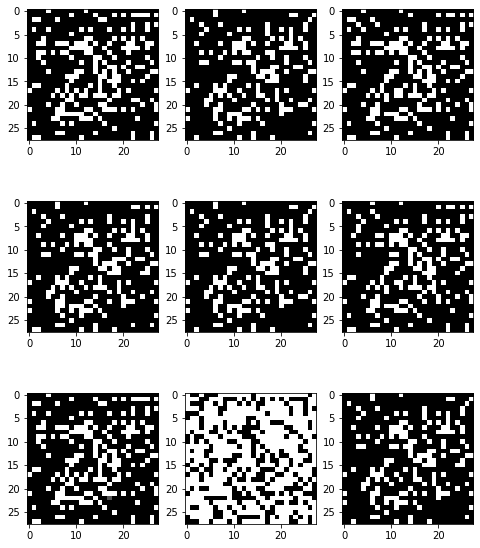

D Loss:  0.6249721646308899
G Loss:  2.139434814453125


In [0]:
## Training loop

for epoch in range(epochs):
    for i, (images, _) in enumerate(train_loader):
        
        # We set targets_real and targets_fake to non-binary values(soft and noisy labels).
        # This is a hack for stable training of GAN's.  
        # GAN hacks: https://github.com/soumith/ganhacks#6-use-soft-and-noisy-labels
        
        targets_real = (torch.FloatTensor(images.size(0), 1).uniform_(0.8, 1.0)).to(device)
        targets_fake = (torch.FloatTensor(images.size(0), 1).uniform_(0.0, 0.2)).to(device)
        
        images = images.to(device)
        
        # YOUR CODE HERE
        # raise NotImplementedError()
        
        
        ## D-STEP:
        ## First, clear the gradients of the Discriminator optimizer.
        optimizer_D.zero_grad()
        ## Estimate logits_real by passing images through the Discriminator
        logits_real = discriminator(images)
        ## Generate fake_images by passing random noise through the Generator. Also, .detach() the fake images 
        ## as we don't compute the gradients of the Generator when optimizing Discriminator.
        ## fake_images = generator(noise(train_bs, noise_dim)).detach()
        fake_images = generator(noise(train_bs, noise_dim)).detach()
        ## Estimate logits_fake by passing the fake images through the Discriminator
        logits_fake = discriminator(fake_images)
        ## Compute the Discriminator loss by calling DLoss function.
        discriminator_loss = DLoss(logits_real, logits_fake, targets_real, targets_fake)
        ## Compute the gradients by backpropagating through the computational graph. 
        discriminator_loss.backward() 
        ## Update the Discriminator parameters.
        optimizer_D.step()
        
        
        ## G-STEP:
        ## clear the gradients of the Generator. 
        optimizer_G.step()
        ## Generate fake images by passing random noise through the Generator. 
        fake_images = generator(noise(train_bs, noise_dim))
        ## Estimate logits_fake by passing the fake images through the Discriminator.
        logits_fake = discriminator(fake_images)
        ## compute the Generator loss by caling GLoss.
        generator_loss = GLoss(logits_fake, targets_real)
        ## compute the gradients by backpropagating through the computational graph.
        generator_loss.backward() 
        ## Update the Generator parameters. 
        optimizer_G.step()
    
    print("D Loss: ", discriminator_loss.item())
    print("G Loss: ", generator_loss.item())
          
    if epoch % 2 == 0:
        viz_batch = fake_images.data.cpu().numpy()
        fig = plt.figure(figsize=(8,10))
        for i in np.arange(1, 10):
            ax = fig.add_subplot(3, 3, i)
            img = viz_batch[i].squeeze()
            plt.imshow(img)
        plt.show()